# Exercise 5

Authors: Micha David Hess, Viviane Walker

Matriculation-Numbers: 20-719-183, 18-719-070

## Task 1: Pandas and seaborn

In this exercise, you will familiarize yourself with the modules pandas and seaborn.

### What are pandas and seaborn?

Pandas is a Python library, which is used for working with data sets. It has many functions that make manipulating and analyzing data easier.

Seaborn is a python library based on matplotlib. It allows you to create good-looking graphs and visualizations easily, and it's well-suited to working with panda data frames.


### Dataset

The dataset we are analyzing is called '[University students by year, ISCED field, sex and level of study](https://www.bfs.admin.ch/bfs/en/home/statistics/catalogues-databases/data.assetdetail.21884445.html)' and comes from the Bundesamt für Statistik. We provided you with a file called `student_data.csv`, which contains the data for the last ten years.

### Solving this task

Work through this Jupyter notebook, making sure to run each code panel before moving on to the next. Read the descriptions carefully and fill in where there's a #TODO.

In [2]:
# !pip3 install pandas
# !pip3 install seaborn

In [3]:
""" Run this import statement once, so that you have all the packages available to you. """

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.1 Read in the data

Read in the data, creating a [pandas data frame](https://www.w3schools.com/python/pandas/pandas_dataframes.asp). Don't forget to open the file you want to work with. You can use the function [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to do so. If you run into trouble with pandas not separating the columns/rows correctly, look at your file in a different program and then specify the separator that is being used.

You can use data_frame.head() to print the first few lines and see what the data structure looks like.

In [4]:

with open("student_data.csv", "r", encoding="utf-8") as f1:
    df = pd.read_csv(f1, sep=";")
# df.head()

### 1.2 Students by level of study

Now we will have a look at the data. 

1. How many Bachelor's, Master's and Doctorate students were there each year (across all subjects)? You can use the pandas function '[groupby](https://www.geeksforgeeks.org/pandas-groupby/)' to do this.
2. Visualize this data using a [seaborn lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html), so that you can see how the student numbers changed over the years.

In [5]:
df

,Year,ISCED Field,Sex,Bachelor,Master,Doctorate
0,2012/13,Education science,Male,115,89,103
1,2012/13,Education science,Female,584,380,220
2,2012/13,Teacher training without subject specialisation,Male,144,61,12
3,2012/13,Teacher training without subject specialisation,Female,688,483,31
4,2012/13,Teacher training with subject specialisation,Male,771,356,23
...,...,...,...,...,...,...
815,2021/22,Pharmacy,Female,954,428,134
816,2021/22,Social work and counselling,Male,29,16,4
817,2021/22,Social work and counselling,Female,125,43,5
818,2021/22,Military and defence,Male,43,0,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

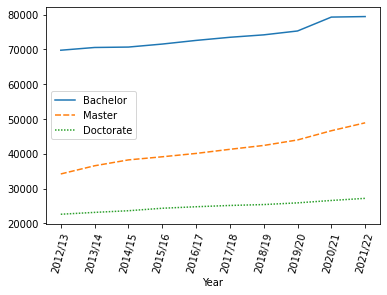

In [6]:
# groupby() function
vis = df.groupby(["Year"])
# print(vis) # is a data frame groupby object
vis2 = vis.aggregate(np.sum)
# vis2

# # visualization with seaborn as sns
sns.lineplot(data=vis2)
plt.xticks(rotation=75)

# # or:
# xy = sns.lineplot(data=vis2)
# xy.tick_params(axis="x", rotaion=90)


### 1.3 Students of Year 2021/22

Now we only want to look at the students from the year 2021/22.
1. Make a new table only containing the students of year 2021/22.
2. Add a column called 'sum', containing the sum of all Bachelor, Master and Doctorate students for each subject respectively.
3. Make a [bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html) using seaborn, so that you can compare the different subjects in terms of student numbers. Which subject had the most students? Which one the fewest?

/var/folders/vp/74tmsgvx2k3c175h0tdtvswr0000gn/T/ipykernel_8907/871252431.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sum']= df3.iloc[:, -3:].sum(axis=1)


<AxesSubplot:xlabel='sum', ylabel='ISCED Field'>

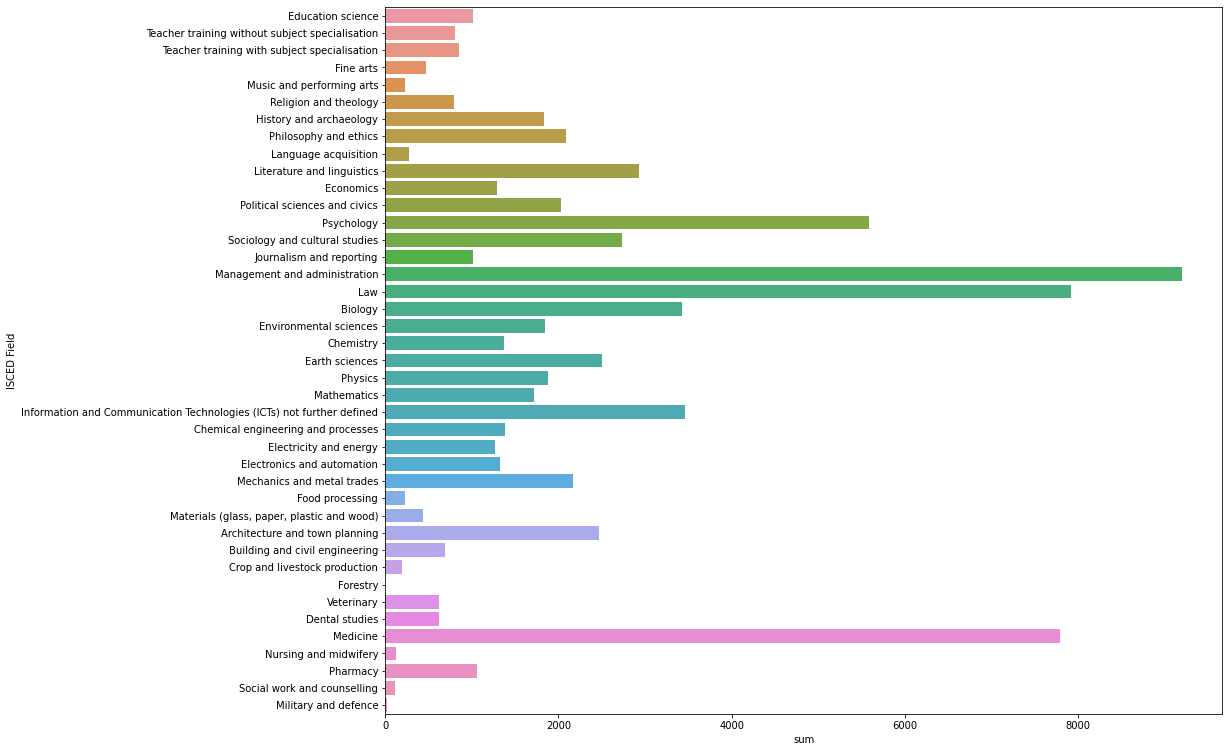

In [17]:
# also have a look at what we are working with:
# df

df2 = df[df["Year"]=="2021/22"]

# df3 = df2.groupby("ISCED Field").aggregate(np.sum) # no grouping... I hope this is not wrong
df3 = df2


## Option A, not working
# df3_sum = df["Bachelor"] + df["Master"] + df["Doctorate"] # --> this did not work, why?, idk
# df3["sum"] = 0 # apparently you first have to set the value to 0, otherwise pandas assign the column values to NaN
# # df3["sum"] = df3_sum

## Option B, works, for ALL columns and for specific columns
# df3['sum']= df3.sum(axis=1) #this function applies to all column, if you only want to apply it to certain columns:
df3['sum']= df3.iloc[:, -3:].sum(axis=1)
# print(type(df3))


###
# df3["ISCED Field"].dtype() #is a index type?? this attribute did not work though. -->
# df_2 = df.groupby('A').sum()
# df_2.reset_index(inplace=True)
# sns.barplot(x='A', y='B', data=df_2);
###

# visualization with seaborn as sns
# sns.barplot(y="sum", x="ISCED Field", data=df3, ci=None)
# plt.xticks(rotation=90) # this rotates the labels, since there are a lot of labels, they overlapped each other
# plt.tight_layout() # setting the layout to tight.

# # or:
# plt.figure(figsize=(15,13))
# sns.barplot(y="ISCED Field", x="sum", data=df3, ci=None)

# most students: Management and administration
# least students: Forestry


### 1.4 Gender distribution

1. The data set also includes data on the legal gender/sex of the students. Select five different subjects, and plot them in a way so you can compare the development over the years. You can be creative with it: You can compare the absolute numbers, compare the gender ratio and/or compare the different subjects to each other.
2. What is something interesting you've discovered by visualizing the data this way? Did it help you to better understand the data?
3. A very cool feature of seaborn are the ways in which you can customize the [look of your plots](http://seaborn.pydata.org/tutorial/aesthetics.html). Try out some different colors and styles on your plots. :)




(array([0, 1, 2, 3]),
 [Text(0, 0, 'Psychology'),
  Text(1, 0, 'Biology'),
  Text(2, 0, 'Philosophy and ethics'),
  Text(3, 0, 'Earth sciences')])

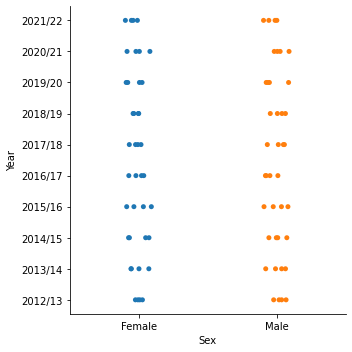

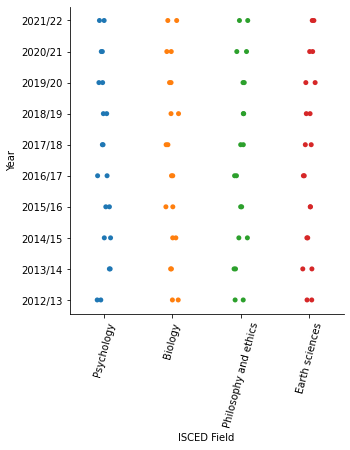

In [56]:
df4 = df[["Year", "ISCED Field", "Sex"]]

psy = df4[df4["ISCED Field"] == "Psychology"]
bio = df4[df4["ISCED Field"] == "Biology"]
phil = df4[df4["ISCED Field"] == "Philosophy and ethics"]
earth = df4[df4["ISCED Field"] == "Earth sciences"]
hist = df4[df4["ISCED Field"] == "History and archeology"]

merged = psy.append([bio, phil, earth, hist])
# print(merged)

merged2 = merged[["Year", "Sex"]]
merged3 = merged2.groupby("Year")
# print(type(merged3["Sex"])) # is a series


sns.catplot(x="Sex", y="Year", order=["Female", "Male"], data=merged2)
# 3. --> trying to plot the column "Sex" made me realize that I cannot use aggregate nor np.sum on this column, BECAUE
# it is a categorical or series type of column. therefore, scatterplot are much more convenient for this type of column.

# or:
sns.catplot(x="ISCED Field", y="Year", kind="strip", data=merged)
plt.tight_layout()
plt.xticks(rotation=75)

# or:
# kind="box", "count", "point", "violin", "bar" all do not work because neither x nor y are numerical (they are categorical).




## Task 2: Writing a README

A good README or documentation is key to your program or package being used properly or being used at all. But as you know, some documentations are a pain to work through. There are some conventional guidelines you can follow, to ensure that your documentation is as precise and short as possible.

In this task, you will practise writing a README within a given maximum number of sentences. Keep it simple and short. Have a look at the code in the cell below. Try to run it and understand how it works. Once you grasped the idea and workings of the code, write a README following the given structure.

In [2]:
#!/usr/bin/env python3

# Author: Giovanna Gelata



class Gelateria:

    food_type = 'ice cream'

    def __init__(self, name: str, location: str):
        self.name = name
        self.location = location
        self._flavours = list()
        self._price = 1.00
        self._order_number = 1


    def add_flavours(self, flavours):
        if type(flavours) == str:
            if flavours in self._flavours:
                print(f'Flavour "{flavours}" is already in the system.')
            else:
                self._flavours.append(flavours)
        elif type(flavours) == list:
            for flavour in flavours:
                if flavour in self._flavours:
                    print(f'Flavour "{flavour}" is already in the system.')
                else:
                    self._flavours.append(flavour)


    def _calculate_price(self, number_of_scoops: int):
        return number_of_scoops * self._price


    def take_order(self):
        order = dict()
        count_ice = 0
        price = 0
        print()
        print('-'*15)
        print(f'Order {self._order_number}')
        print('-'*15)
        print('Your order:')
        add_more = None

        while add_more != 'q':
            count_ice += 1
            flavours = input('Flavours separated by commas: * ').split(",")
            # print(flavours)
            for flav in flavours:
                flav_clean = flav.strip()
                if flav_clean not in self._flavours:
                    print(f'Sadly, flavour \'{flav}\' is not available.')
                    del flavours[flavours.index(flav)]
                    continue
            amounts = input('Amounts separated by commas: * ').split(",")
            order[count_ice] = {i: j for i, j in zip(flavours, amounts)}
            add_more = input('To add more, press enter. If you\'re finished, press \'q\'. ')

        for order_no, it in order.items():
            for k, v in it.items():
                price += self._calculate_price(float(v))
        

        print(f'Price: {price}0 €')
        print('Thank you for your order!')

        self._order_number += 1


    def __repr__(self):
        string = '\n'
        string += f'Welcome to the gelateria {self.name} from {self.location}!\n'
        string += f'We are happy to serve you. Our hand-made ice cream is made from an original family recipe.\n'
        string += 'We offer the following flavours of ice cream for you to enjoy: \n'
        if self._flavours:
            for flav in self._flavours:
                string += f'\t* {flav.capitalize()}\n'
        else:
            string += '\tUnfortunately, we have no flavours available.\n'
        string += 'We are happy to serve you!\n'
        return string



---------------
Order 1
---------------
Your order:
Price: 6.00 €
Thank you for your order!


Please write your answers in the text cell below.

### Gelateria

Author: Giovanna Gelata

This project let's the user create objects of the class 'Gelateria' (ice-cream shop). A Gelateria has a name and location, you can add custom flavours to your shop, and of course order ice-cream!  

##### **Installation**

In order to use the Gelateria class, download (or copy-paste) the code into the directory where you intend to use it, or simply a directory where you want to store your scripts, and save it under a name of your choice (e.g. *my_gelateria.py*).
Then, in the code where you intend to create a Gelateria-object, write an import statement for the Gelateria (`from my_gelateria import Gelateria`).
**Requires:**
-  Python 3.6 or higher (because of the f-strings)

##### **Functionalities**

To construct a Gelateria, it needs to be called with two parameters:
The first argument is the name given to the Gelateria, the second argument is its location. Both arguments should be of type string.
    Example:
    `gdz = Gelateria('Gelateria di Zurigo', 'Züri')`

Gelateria has the following **attributes**:
- the **_class attribute_** `food_type` designating what kind of food the Gelateria serves
- a name (str): `self.name`
- a location (str):             `self.location`
- a list of flavours (list):    `self._flavours` 
- a price (float):              `self._price` 
- a count of orders (int):      `self._order_number`

Gelateria has the following **methods**:
- `add_flavours(self, flavours)`:
    - can be called with a single string or a list of strings
    - adds the given flavour(s) to the object's list of flavours (*self._flavours*)
    - won't store duplicate flavours
    <br>Example:<br>
    `gdz.add_flavours(['Chocolate', 'Pistachio', 'Chocolate-sorbet', 'Blackberry and Hemp'])`
- `take_order(self)`:
    - is called without any arguments besides `self`
    - Will perform as follows:
        1. It prints information and instructions to the Command-Line, including the order number. It then tells the user/customer to type in the flavours they want, separated by commas. If a flavour does not exist, a message saying that is printed and that part of the input is ignored.
        1. It prompts the user to type in the number of scoops they want for each flavour, separated by commas. The order of flavours is kept the same as in the previous step, excluding non-existent flavours.
        1. Presents the user with two additional options:
            - Add more flavours, upon which the process jumps back to step **1**.
            - Finish the order by inputting `q`, continuing to step **4**
        1. Displays the price, which is calculated using the protected function `_calculate_price`, and thanks the user for their order.
        1. Increases the order count (`self._order_number`) by 1 .<br>
        Example of what such a interaction could look like:<br>
        `gdz.take_order()`<br>
            ```   
            ---------------
            Order 1
            ---------------
            Your order:
            Flavours separated by commas: *
            ```
            
            \>\>\> `Chocolate, Chocolate-sorbet` 
            ```
            Amounts separated by commas: *
            ```
            \>\>\> `1, 5`
            ```
            To add more, press enter. If you're finished, press 'q'.
            ```
            \>\>\> `q`
            
            ```
            Price: 6.00 €
            Thank you for your order!
            ```


- `__repr__(self)`:
    - Prints a nicely formatted string, which includes the _name_ and _location_ of the Gelateria and the available _flavours_. If there are no flavours available, a string informing the user of that is printed instead. 
    Example:<br>
        `print(gdz)`<br>
        ```
        Welcome to the gelateria Gelateria di Zurigo from Züri!
        We are happy to serve you. Our hand-made ice cream is made from an original family recipe.
        We offer the following flavours of ice cream for you to enjoy: 
        * Chocolate
        * Pistachio
        * Chocolate-sorbet
        * Blackberry and hemp
        We are happy to serve you!
        ```
    



##### **Improvements**
Some ideas to improve this project:
- Making the gelateria a pip-installable module
- Letting a user change the flavours of the ice-cream shop, mostly by letting them remove flavours from a Gelateria-object
- Fixing the issue of letting a user add non-string flavours in lists
- Variable pricing, for example:
    - the more scoops, the lower the average price per scoop
    - differently priced flavours
- Keeping track of stock (currently, ice-cream is infinite)

# Feedback

Please give us a short feedback on this exercise. You can type in your answers and thoughts into the text boxes below.


a) How much time did you spend roughly on this exercise?

roughly 12 hours

b) How difficult was this exercise? Was the difficulty too high, too low or just right?

It was one of the easier exercises, even though the topic of Data Analysis can get very complicated very fast.
Iwouldn't say it was too easy however, since it still required quite a bit of docs-reading and thinking.

c) Do you feel more comfortable now with the topics from the exercise and lectures?

Micha's opinion: Only slightly. Obviously, we barely scratched the surface of the topic and the modules we used. So, in order to feel comfortable, a much deeper look about how these packages work, the different classes etc. would be necessary - but way too much for one lecture. Knowing that doing things that are just a bit more advanced than the absolute basics can very soon get overwhelming isn't ideal, but if we're only meant to get a basic idea of what's doable and how some basics work, I think it's fine. 
 So yeah, slightly comfortable :)

## Exam Prep – Task 3: Object Oriented Programming

Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.



### Destination Class
You want to go sightseeing in Zurich, but there's so much to do! To help you store all the different landmarks, you decide to write a program and create a Python class.

In the folder `zurich_sightseeing` you will find five .txt files containing basic information about one destination each. Have a look at the files. You should be able to read them in easily, since they are all structured in the same way.

To instanciate a single destination, you call the class as follows:

```
>>> grossmunster = Destination("zurich_sightseeing\grossmunster")
```

You want to easily be able to look at all the information about the destination, so **printing the object** should just return all the information in the .txt file.

```
>>> print(grossmunster)

Grossmünster
The Grossmünster church is a landmark of Zurich. Legend has it that the church was built on the graves of the city’s patron saints, Felix and Regula.

Distance to Zurich Main Station: 892 m
Open on: Mon Tue Wed Thu Fri Sat Sun
```

When you're planing where to go, you want to be able to compare two destinations on **how far away they are from Zurich Main Station**. You have to be careful, since some distances are in m, others in km.

If you want to know if the Grossmünster is further away from the Main Station than the Kunsthaus, you can check like this:



```
>>> grossmunster > kunsthaus

False
```

When deciding on a day for your trip, it's important to know if the destinations in question are open on the same day! You want to be able to check **if a destination is open on a specific day**, as well as check **what opening days two destinations share with each other**.


```
>>> grossmunster.open_on("Tue")

True

>>> grossmunster.shared_opening_days(photobastei)

Thu Fri Sat Sun

```







## Exam Prep – Task 4: Encodings



Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.

### Calculating Prices For Words

You got a call from a company who would like to hire you. The company sells many personalizable items such as mugs, clothing or pencils. They offer a wide range of customizability, but recently they got many complaints about names or words that contain non-ASCII characters or are simply too long to fit (sadly, the company is not too progressive with non-European names, yet). The company is now planning to widen the options for the customers, but of course, it doesn't come for free. Depending on the personalizzation, prices vary. Your job is to write a program that calculates the prices for the items according to length of word(s) and number of non-ASCII characters.

First of all, create a class, which takes any string as input. The string can include non-ASCII characters and emojis. To calculate the final price, you need to calculate the 'length-weight' first. Alter the \_\_len__ method in a way, that it returns your own calculated length, instead of the Python defaulted one. The method should be callable like this:

```
# how it should be
>>> name = Personalize('Ali Smith')
>>> len(name)
8
```

Since printing non-standard characters is more work (according to the printing company), the price of a string varies depending on its characters. Your boss gave you some rules that your program should follow:

* Whitespaces don't count
* ASCII characters count 1 each
* ASCII characters with accents count 1 each
* Emojis count 2 each
* Characters outside the Latin writing system count 3 each

A call of the len-function could look like the following: 
```
# how it should be
>>> name = Personalize('Ali Smith 🌈')
>>> len(name)
10
```
#### Emojis

To calculate the weight of emojis, some further processing is needed. As emojis get more features, single glyphs are not enough anymore. Some emojis require many pieces. The different 'sub-emojis' are connected by the so-called *zero-width* character '\u200d'. If this character is present, you can assume that the whole emoji-string belongs together.

```
# example of Python's default
>>> text = '👰🏾‍♂️'
>>> [char for char in text]
['👰', '🏾', '\u200d', '♂', '️']
>>> t2 = '🏐💗'
>>> [char for char in t2]
['🏐', '💗']  # as you can see, no zero-with character is used
```

Especially for person emojis, sex and skintone can be modified. By default, Python counts the modifying codepoints and adds them up. For example, one single emoji can have a length of five.

```
# how it should NOT be
>>> text = '👰🏾‍♂️'
>>> len(text)  # see the cope snipped above for reference
5
```

Such customizations should not cost extra, since the 'length' of the emoji is not affected – no matter which sex or skintone it has, the emoji is always one glyph. For sex, emojis can have the attribute ♀, ♂ or nothing. The five available skintones are:
* 🏻
* 🏼
* 🏽
* 🏾
* 🏿

None of them should increase the price. Thus, your code should output the following:

```
# how it should be
>>> emoji = Personalize('👰🏾‍♂️')
>>> len(emoji)
2

```

For the exercise, you might want to use the [emoji](https://pypi.org/project/emoji/) module. Especially the attribute EMOJI_DATA could come in very handy. Have a look at its value(s).

#### Non-Latin Writing Systems

For any character which cannot be encoded in Latin-1, the count should increase by 3. See the examples below.


#### Calculating
Lastly, write a function that returns a price to the user according to input. The item should be defined at instantiation of the class.

```
>>> name = Personalized('Ali Smith', 'mug')
```

Don't forget to add the prices for the items that should be personalized. To do so, use the dictionary in the code cell below. The new calculated length is the price in any currency you like. Make a nice interface that returns a type of receipt for the user. All characters, their prices and the final price should be enlisted.

### Examples
The following examples might help to understand the workings of the functions further.

```
>>> name_jp = Personalize('莉子', 'notebook')
>>> len(name_jp)
6
>>> calculate_price(name_jp)
16 CHF

```


```
>>> name_fr = Personalize('Allez les bleus! Olé', 'cap')
>>> calculate_price(name_fr)
32 CHF

```

```
>>> name_emojis = Personalize('Anaïs 👱🏼‍♀️🍋', 'flag')
>>> calculate_price(name_emojis)
39
```

In [ ]:
pricing = {
    'mug': 10,
    't-shirt': 20,
    'notebook': 5,
    'waterbottle': 45,
    'drinking glass': 10,
    'pencil': 3,
    'backpack': 80,
    'cap': 15,
    'flag': 30,
    'ferrari': 400000
}